hi everyone. So in the spirit of christmas, i will be analyzing the christmas movies data set to help you know
which movies to watchthis december

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [119]:
data = pd.read_csv('C:/Users/lenovo/Documents/Christmas_movie_analysis/christmas_movies.csv')

In [120]:
data.head()

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
0,Love Actually,R,135.0,7.6,55.0,"Comedy, Drama, Romance",2003.0,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","517,283",$59.70M,https://m.media-amazon.com/images/M/MV5BNThkNj...,Movie
1,Home Alone,PG,103.0,7.7,63.0,"Comedy, Family",1990.0,"An eight-year-old troublemaker, mistakenly lef...",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...","629,713",$285.76M,https://m.media-amazon.com/images/M/MV5BMzFkM2...,Movie
2,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,49.0,Comedy,1989.0,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","213,196",$71.32M,https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie
3,Elf,PG,97.0,7.1,66.0,"Adventure, Comedy, Family",2003.0,"Raised as an oversized elf, Buddy travels from...",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...","300,546",$173.40M,https://m.media-amazon.com/images/M/MV5BMzUxNz...,Movie
4,How the Grinch Stole Christmas,PG,104.0,6.3,46.0,"Comedy, Family, Fantasy",2000.0,"On the outskirts of Whoville lives a green, re...",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...","280,898",$260.04M,https://m.media-amazon.com/images/M/MV5BNWNiNT...,Movie


In [121]:
data.shape

(873, 14)

In [122]:
data.isnull().sum()

title             0
rating          213
runtime          41
imdb_rating      34
meta_score      773
genre             1
release_year     11
description       0
director          5
stars            11
votes            34
gross           794
img_src           0
type              0
dtype: int64

In [123]:
data.duplicated().any()

False

In [124]:
data.describe()

,runtime,imdb_rating,meta_score,release_year
count,832.000000,839.000000,100.000000,862.000000
mean,86.596154,6.100477,57.650000,2009.498840
std,18.152062,0.966392,17.901174,20.274696
min,1.000000,1.300000,18.000000,1898.000000
25%,84.000000,5.600000,46.750000,2010.000000
50%,87.000000,6.200000,56.000000,2017.000000
75%,91.000000,6.700000,69.000000,2020.000000
max,199.000000,9.200000,96.000000,2023.000000


### Number of Movies by rating

In [126]:
rating = data.groupby('rating')['runtime'].count().sort_values()
rating

rating
TV-Y           4
TV-MA          5
Unrated       10
R             15
TV-14         15
Passed        18
Approved      20
PG-13         24
G             29
Not Rated     53
PG            72
TV-PG        131
TV-G         258
Name: runtime, dtype: int64

###  Highest Rated Movies 

In [129]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type'],
      dtype='object')

In [130]:
movie_rating = data.nlargest(10, 'imdb_rating')[['title', 'imdb_rating', 'release_year']].set_index('title')
movie_rating

,imdb_rating,release_year
title,,
It's Always Sunny in Philadelphia: A Very Sunny Christmas,9.2,2005.0
ABC Stage 67: A Christmas Memory,9.0,1966.0
It's a Wonderful Life,8.6,1946.0
A Kylie Christmas: Live from the Royal Albert Hall,8.6,2015.0
Anne of Green Gables,8.5,1985.0
Jingle Vingle,8.5,2022.0
Christmas Eve on Sesame Street,8.4,1978.0
The Original Christmas Classics,8.4,1965.0
How the Grinch Stole Christmas!,8.3,1966.0


looks like a lot of old movies made it into the top 10. Anne of green gabels is my personal favourite
im glad it found its wany to number 5

Text(0.5, 1.0, 'Highest rated Christmas movies and their year of release')

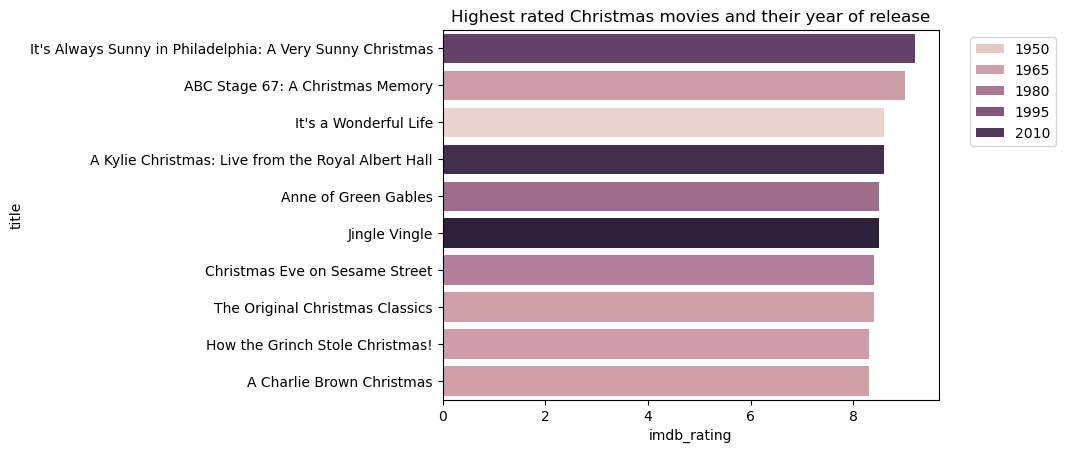

In [132]:
sns.barplot(x='imdb_rating', y = movie_rating.index, hue = 'release_year', data = movie_rating, dodge = False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Highest rated Christmas movies and their year of release')

### average rating of Movies by year

In [134]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type'],
      dtype='object')

In [135]:
release_year =  data.groupby('release_year')[['imdb_rating']].mean().sort_values(by = 'imdb_rating').tail(10)
release_year

,imdb_rating
release_year,
1990.0,7.80
1983.0,8.00
1964.0,8.00
1940.0,8.00
1982.0,8.20
1960.0,8.30
1965.0,8.35
1966.0,8.65
1959.0,NaN


Looks like 1966 was a really good year for christmas movies

### Movie with highest votes

In [138]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type'],
      dtype='object')

In [139]:
### votes needs to be changed to numeric variable
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')

In [140]:
highest_votes = data.nlargest(10, 'votes')[['title','votes']].set_index('title')
highest_votes

,votes
title,
The Santa Summit,997.0
Holiday Road,992.0
Christmas Staycation,992.0
Mistletoe & Menorahs,992.0
Undercover Christmas,992.0
A Song for Christmas,981.0
A Twist of Christmas,980.0
Stealing Christmas,979.0
The Christmas Chalet,977.0


### Movie with longest runtime

In [142]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type'],
      dtype='object')

In [143]:
longest_movies = data.nlargest(10, 'runtime')[['title','director','runtime']].set_index('title')
longest_movies

,director,runtime
title,,
Anne of Green Gables,Megan Follows,199.0
Love's Christmas Journey,David S. Cass Sr.,171.0
Babes in Toyland,Clive Donner,140.0
Love Actually,Richard Curtis,135.0
Little Women,Greta Gerwig,135.0
Rent,Chris Columbus,135.0
Die Hard,John McTiernan,132.0
Shazam!,David F. Sandberg,132.0
It's a Wonderful Life,Frank Capra,130.0


Text(0.5, 1.0, 'Longest Movies')

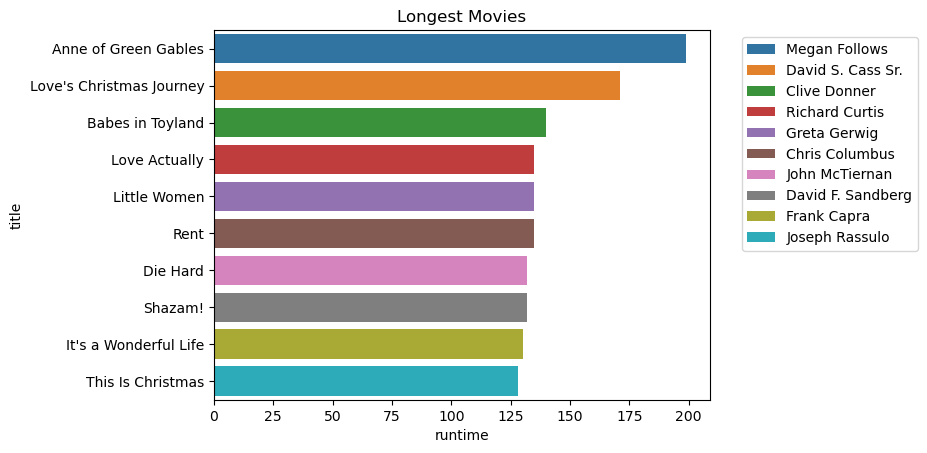

In [144]:
sns.barplot(x = 'runtime', y  = longest_movies.index, hue = 'director', data = longest_movies)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Longest Movies')

The longest movie is anne of green gables by Megan Follows

### Directors that produced the most christmas movies

In [147]:
highest_directors = data.groupby('director')['imdb_rating'].count().sort_values().tail(10)
highest_directors

director
Michael M. Scott     8
Marita Grabiak       9
Terry Ingram         9
Ron Oliver           9
Don McBrearty       11
Fred Olen Ray       11
Jake Helgren        11
Justin G. Dyck      12
Peter Sullivan      13
David Winning       13
Name: imdb_rating, dtype: int64

<Axes: xlabel='count', ylabel='director'>

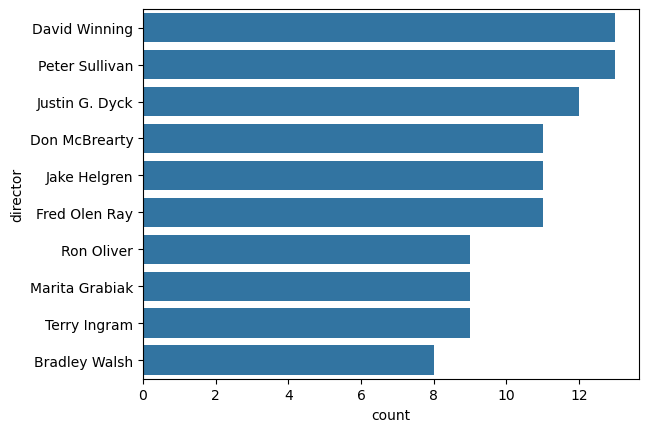

In [148]:
category_counts = data['director'].value_counts().head(10)
sns.countplot(y='director', data=data,  order=category_counts.index)

looks like david winning is responsible for giving us the most christmas movies.

### Do votes affect rating

In [151]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type'],
      dtype='object')

Text(0.5, 1.0, 'correlation between votes and imdb rating')

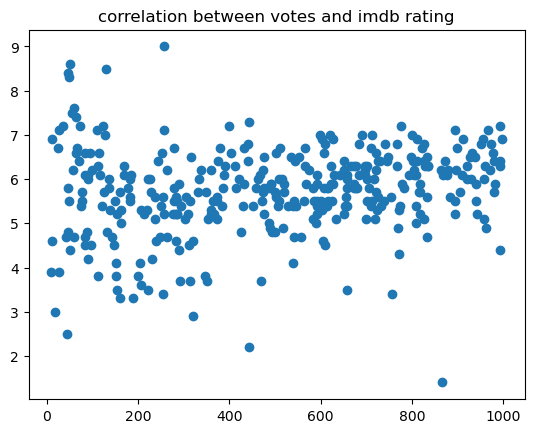

In [152]:
plt.scatter(x = 'votes', y = 'imdb_rating', data = data)
plt.title('correlation between votes and imdb rating')

In [153]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type'],
      dtype='object')

### Highest Rated Director

In [155]:
group = data.groupby('director')['imdb_rating'].mean().sort_values()
cleaned_group = group.dropna().tail(10)
cleaned_group

director
John McTiernan       8.2
Billy Wilder         8.3
Chuck Jones          8.3
Cole Patterson       8.3
Jon Stone            8.4
Mark Sujay Samuel    8.5
Frank Capra          8.6
Paul Dugdale         8.6
Frank Perry          9.0
Fred Savage          9.2
Name: imdb_rating, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

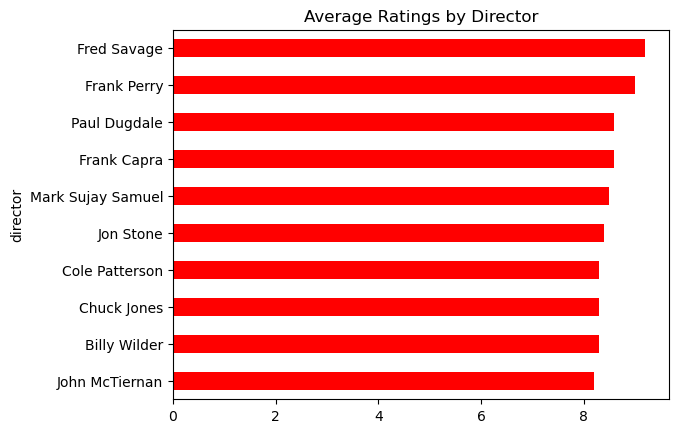

In [200]:
cleaned_group.plot(kind='barh', color='red', title='Average Ratings by Director')
plt.label('Highest Rated Directors')

Looks like Fred savage is the highest rated director. lets see what movies these people are respnsible for

In [214]:
data.nlargest(10, 'imdb_rating')[['director', 'title', 'imdb_rating']].set_index('director')

,title,imdb_rating
director,,
Fred Savage,It's Always Sunny in Philadelphia: A Very Sunn...,9.2
Frank Perry,ABC Stage 67: A Christmas Memory,9.0
Frank Capra,It's a Wonderful Life,8.6
Paul Dugdale,A Kylie Christmas: Live from the Royal Albert ...,8.6
Megan Follows,Anne of Green Gables,8.5
Mark Sujay Samuel,Jingle Vingle,8.5
Jon Stone,Christmas Eve on Sesame Street,8.4
NaN,The Original Christmas Classics,8.4
Chuck Jones,How the Grinch Stole Christmas!,8.3


### Grouping Imdb_Rating into categories

In [158]:
def rating(rating):
    if rating >= 9.0:
        return 'Excellent'
    elif rating >= 7.0:
        return 'Very good'
    elif rating >= 6.0:
        return 'good'
    elif rating >= 5.0:
        return 'Average'
    else:
        return 'Poor'
    

In [159]:
data['Category'] = data['imdb_rating'].apply(rating)
data['Category']

0      Very good
1      Very good
2      Very good
3      Very good
4           good
         ...    
868         Poor
869         Poor
870         Poor
871         Poor
872         Poor
Name: Category, Length: 873, dtype: object

### category with highest number

In [161]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type', 'Category'],
      dtype='object')

In [162]:
data.groupby('Category')['imdb_rating'].count()

Category
Average      244
Excellent      2
Poor          81
Very good    124
good         388
Name: imdb_rating, dtype: int64

there are 388 good movies to watch this december

Text(0.5, 1.0, 'Count of Movies by Categories')

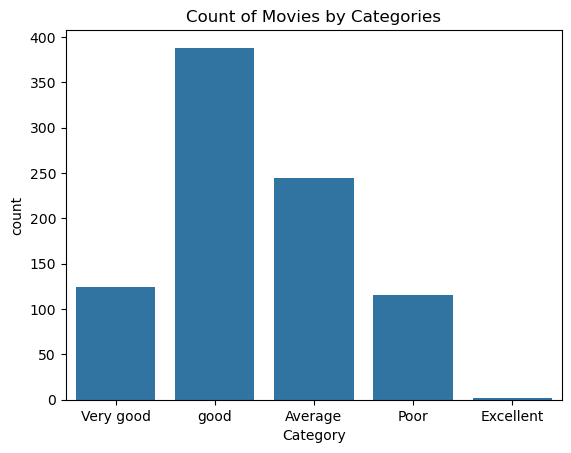

In [164]:
sns.countplot(x = data['Category'])
plt.title('Count of Movies by Categories')

###  lets group the year into classic era(1940-1959), family favourites(1960 - 1979), Modern  hits(1980 - 1999) and New traditions(2000 - 2020)

In [216]:
def era(era):
    if era >= 2000:
        return 'New traditions'
    elif era >= 1980:
        return 'Modern Hits'
    elif era >= 1960:
        return 'family favourites'
    else:
        return 'classic era'

In [218]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type', 'Category'],
      dtype='object')

In [220]:
data['era'] = data['release_year'].apply(era)

In [226]:
data['era'].head()

0    New traditions
1       Modern Hits
2       Modern Hits
3    New traditions
4    New traditions
Name: era, dtype: object

Text(0.5, 1.0, 'Era with most movies')

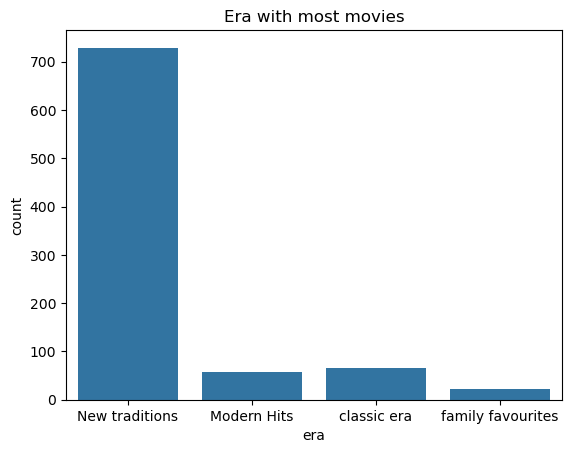

In [230]:
sns.countplot(x = data['era'])
plt.title('Era with most movies')

In [ ]:
### Average rating of eras

In [242]:
era_rate = data.groupby('era')['imdb_rating'].mean()
era_rate

era
Modern Hits          6.530909
New traditions       5.964838
classic era          6.967925
family favourites    7.440000
Name: imdb_rating, dtype: float64

<Axes: title={'center': 'Average Rating of eras'}, ylabel='era'>

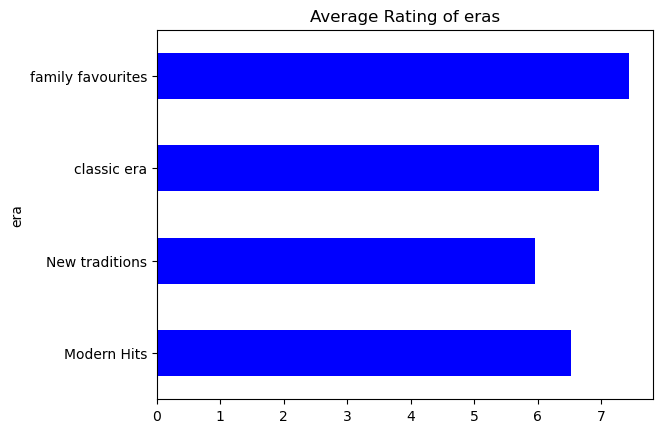

In [244]:
era_rate.plot(kind = 'barh', color = 'blue', title = 'Average Rating of eras')

In [246]:
data.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type', 'Category', 'era'],
      dtype='object')

In [ ]:
### Count of different genres

In [252]:
data['genre'] = data['genre'].astype(str)

In [254]:
lst1 = []
for i in data['genre']:
    lst1.append(i.split(','))
lst1

[['Comedy', ' Drama', ' Romance'],
 ['Comedy', ' Family'],
 ['Comedy'],
 ['Adventure', ' Comedy', ' Family'],
 ['Comedy', ' Family', ' Fantasy'],
 ['Animation', ' Comedy', ' Family'],
 ['Action', ' Thriller'],
 ['Adventure', ' Comedy', ' Crime'],
 ['Animation', ' Adventure', ' Comedy'],
 ['Drama', ' Family', ' Fantasy'],
 ['Comedy', ' Drama', ' Family'],
 ['Comedy', ' Musical', ' Romance'],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comedy', ' Family', ' Musical'],
 ['Drama', ' Family', ' Fantasy'],
 ['Adventure', ' Comedy', ' Family'],
 ['Animation', ' Adventure', ' Comedy'],
 ['Animation', ' Adventure', ' Comedy'],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comedy', ' Family'],
 ['Comedy', ' Family', ' Fantasy'],
 ['Comedy', ' Drama', ' Family'],
 ['Comedy', ' Drama', ' Romance'],
 ['Action', ' Comedy', ' Crime'],
 ['Comedy', ' Drama', ' Family'],
 ['Comedy'],
 ['Comedy'],
 ['Comedy', ' Crime', ' Drama'],
 ['Adventure', ' Comedy', ' Family'],
 ['Animation', ' Family', ' Fantasy'],
 ['Comedy', 

In [256]:
lst2 = []

for item in lst1:
    for item1 in item:
        lst2.append(item1)
lst2

['Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Family',
 'Comedy',
 'Adventure',
 ' Comedy',
 ' Family',
 'Comedy',
 ' Family',
 ' Fantasy',
 'Animation',
 ' Comedy',
 ' Family',
 'Action',
 ' Thriller',
 'Adventure',
 ' Comedy',
 ' Crime',
 'Animation',
 ' Adventure',
 ' Comedy',
 'Drama',
 ' Family',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Family',
 'Comedy',
 ' Musical',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Family',
 ' Musical',
 'Drama',
 ' Family',
 ' Fantasy',
 'Adventure',
 ' Comedy',
 ' Family',
 'Animation',
 ' Adventure',
 ' Comedy',
 'Animation',
 ' Adventure',
 ' Comedy',
 'Comedy',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Family',
 'Comedy',
 ' Family',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Family',
 'Comedy',
 ' Drama',
 ' Romance',
 'Action',
 ' Comedy',
 ' Crime',
 'Comedy',
 ' Drama',
 ' Family',
 'Comedy',
 'Comedy',
 'Comedy',
 ' Crime',
 ' Drama',
 'Adventure',
 ' Comedy',
 ' Family',
 'Animation',
 ' Family',
 ' Fantasy',
 'Comedy',
 ' Family'

In [258]:
# We will import the fuctionss counter form the library called collections
from collections import Counter

In [322]:
genre = Counter(lst2)
genre

Counter({'Comedy': 440,
         ' Romance': 407,
         ' Family': 249,
         ' Drama': 237,
         'Drama': 208,
         ' Fantasy': 94,
         'Romance': 65,
         ' Comedy': 55,
         'Animation': 47,
         'Family': 33,
         'Adventure': 25,
         ' Music': 24,
         ' Musical': 22,
         ' Adventure': 20,
         ' Crime': 19,
         ' Mystery': 17,
         'Short': 17,
         ' Short': 12,
         'Action': 8,
         ' Horror': 7,
         'Crime': 6,
         ' Film-Noir': 5,
         ' Sci-Fi': 5,
         ' Thriller': 4,
         'Biography': 4,
         'Horror': 3,
         'Musical': 3,
         'Music': 3,
         'News': 3,
         'Fantasy': 2,
         'Mystery': 2,
         ' Sport': 2,
         ' War': 2,
         ' Western': 2,
         ' History': 2,
         'Documentary': 2,
         ' Talk-Show': 2,
         ' Action': 1,
         'nan': 1,
         'Film-Noir': 1})

looks like most christmas movies are either comedy or romance